# LSTM -- Long Short Term Memory Model

In [26]:
import keras as ks
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
import mpl_finance as mpf
from mpl_finance import candlestick_ohlc
import matplotlib.ticker as mticker
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

In [2]:
spy = yf.download(
        tickers = "SPY",
        period = "3y",
        interval = "1d",
        group_by = 'column',
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2018-02-20,271.399994
2018-02-21,270.049988
2018-02-22,270.399994
2018-02-23,274.709991
2018-02-26,277.899994
...,...
2021-02-09,390.250000
2021-02-10,390.079987
2021-02-11,390.709991


In [4]:
#Convert the dataframe to a numpy array
dataset = data.values

In [5]:
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

603

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.28552061],
       [0.27756489],
       [0.27962751],
       [0.30502675],
       [0.32382575],
       [0.30337669],
       [0.28699388],
       [0.26371625],
       [0.27184858],
       [0.29017621],
       [0.29424246],
       [0.29365311],
       [0.30143205],
       [0.32954206],
       [0.32747944],
       [0.31687194],
       [0.30850366],
       [0.3067358 ],
       [0.30202139],
       [0.28015787],
       [0.28286882],
       [0.27980429],
       [0.23996707],
       [0.20684771],
       [0.24845297],
       [0.22187521],
       [0.21733741],
       [0.23690254],
       [0.20342979],
       [0.22287694],
       [0.23931874],
       [0.25157648],
       [0.21668926],
       [0.22423242],
       [0.24868874],
       [0.24049743],
       [0.25328535],
       [0.24868874],
       [0.26153565],
       [0.27839001],
       [0.2795687 ],
       [0.27072905],
       [0.25729262],
       [0.25705702],
       [0.23590082],
       [0.2397313 ],
       [0.25552476],
       [0.256

In [7]:
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

[array([0.28552061, 0.27756489, 0.27962751, 0.30502675, 0.32382575,
       0.30337669, 0.28699388, 0.26371625, 0.27184858, 0.29017621,
       0.29424246, 0.29365311, 0.30143205, 0.32954206, 0.32747944,
       0.31687194, 0.30850366, 0.3067358 , 0.30202139, 0.28015787,
       0.28286882, 0.27980429, 0.23996707, 0.20684771, 0.24845297,
       0.22187521, 0.21733741, 0.23690254, 0.20342979, 0.22287694,
       0.23931874, 0.25157648, 0.21668926, 0.22423242, 0.24868874,
       0.24049743, 0.25328535, 0.24868874, 0.26153565, 0.27839001,
       0.2795687 , 0.27072905, 0.25729262, 0.25705702, 0.23590082,
       0.2397313 , 0.25552476, 0.25699803, 0.24491725, 0.24768702,
       0.23719731, 0.23377921, 0.25381571, 0.25911964, 0.25911964,
       0.27432376, 0.2891743 , 0.29406567, 0.2948318 , 0.28375275])]
[0.29047078876034615]
[array([0.28552061, 0.27756489, 0.27962751, 0.30502675, 0.32382575,
       0.30337669, 0.28699388, 0.26371625, 0.27184858, 0.29017621,
       0.29424246, 0.29365311, 0.301

In [8]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
543/543 [==============================] - 15s 23ms/step - loss: 0.0078
Epoch 2/4
543/543 [==============================] - 10s 19ms/step - loss: 0.0023
Epoch 3/4
543/543 [==============================] - 12s 22ms/step - loss: 0.0015
Epoch 4/4
543/543 [==============================] - 11s 21ms/step - loss: 0.0011


In [13]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
# Convert the data to a numpy array
x_test = np.array(x_test)


In [15]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [16]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8.748497677551173

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



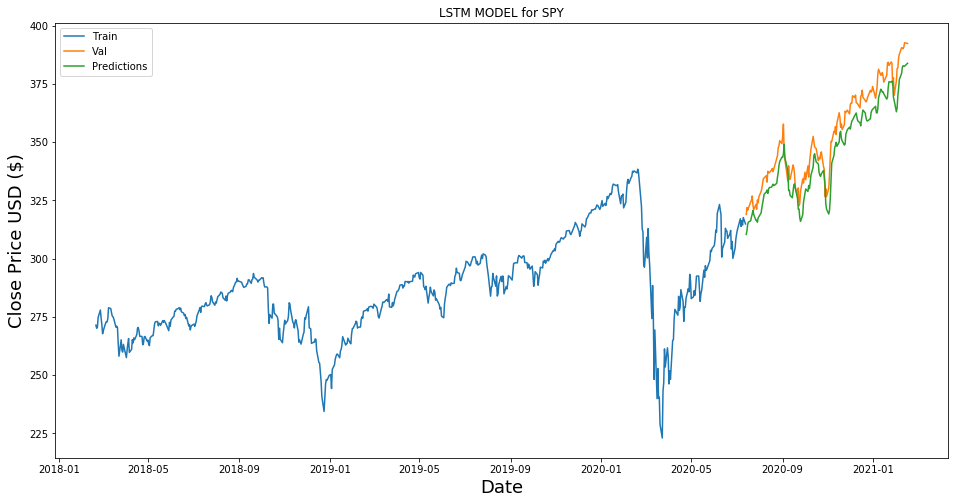

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM MODEL for SPY')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-14,318.920013,310.349762
2020-07-15,321.850006,312.026642
2020-07-16,320.790009,314.840424
2020-07-17,321.720001,315.655243
2020-07-20,324.320007,316.212860
...,...,...
2021-02-09,390.250000,382.074341
2021-02-10,390.079987,382.758270
2021-02-11,390.709991,382.490692


# 1 Month - 5min interval - Intraday LSTM


In [30]:
spy_intra = yf.download(
        tickers = "SPY",
        period = "1mo",
        interval = "5m",
        group_by = 'column',
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [31]:
spy_intra

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-01-19 09:30:00-05:00,378.339996,378.769989,377.980011,378.149994,378.149994,3057769
2021-01-19 09:35:00-05:00,378.149994,378.279999,377.950012,378.059509,378.059509,772327
2021-01-19 09:40:00-05:00,378.079987,378.230011,377.869995,377.899994,377.899994,612058
2021-01-19 09:45:00-05:00,377.898499,378.089996,377.390015,377.440002,377.440002,713468
2021-01-19 09:50:00-05:00,377.369995,377.600006,377.290009,377.357788,377.357788,767408
...,...,...,...,...,...,...
2021-02-16 15:35:00-05:00,392.799988,392.938812,392.290009,392.420013,392.420013,517981
2021-02-16 15:40:00-05:00,392.403015,392.721893,392.329987,392.679993,392.679993,552413
2021-02-16 15:45:00-05:00,392.649994,392.729889,392.399994,392.489990,392.489990,996981


In [33]:
#Create a new dataframe with only the 'Close column
data_1 = spy_intra.filter(['Close'])
data_1

,Close
Datetime,
2021-01-19 09:30:00-05:00,378.149994
2021-01-19 09:35:00-05:00,378.059509
2021-01-19 09:40:00-05:00,377.899994
2021-01-19 09:45:00-05:00,377.440002
2021-01-19 09:50:00-05:00,377.357788
...,...
2021-02-16 15:35:00-05:00,392.420013
2021-02-16 15:40:00-05:00,392.679993
2021-02-16 15:45:00-05:00,392.489990


In [35]:
#Convert the dataframe to a numpy array
dataset_1 = data_1.values

In [36]:
#Get the number of rows to train the model on
training_data_len_1 = int(np.ceil( len(dataset_1) * .8 ))
training_data_len_1

1248

In [37]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_1 = scaler.fit_transform(dataset_1)
scaled_data_1

array([[0.37563409],
       [0.37210092],
       [0.36587229],
       ...,
       [0.93557113],
       [0.93791387],
       [0.92971428]])

In [38]:
#Create the scaled training data set
train_data_1 = scaled_data_1[0:int(training_data_len_1), :]
#Split the data into x_train and y_train data sets
x_train_1 = []
y_train_1 = []

for i in range(60, len(train_data_1)):
    x_train_1.append(train_data_1[i-60:i, 0])
    y_train_1.append(train_data_1[i, 0])
    if i<= 61:
        print(x_train_1)
        print(y_train_1)

[array([0.37563409, 0.37210092, 0.36587229, 0.3479109 , 0.34470066,
       0.35845322, 0.35181944, 0.34895715, 0.35454826, 0.34361509,
       0.33306919, 0.35259638, 0.35515361, 0.34935992, 0.36678627,
       0.37094862, 0.36587229, 0.35806356, 0.36622024, 0.35147148,
       0.34244014, 0.33248768, 0.33658687, 0.34595902, 0.33619721,
       0.34439679, 0.34919905, 0.35786813, 0.3639204 , 0.3561653 ,
       0.36806726, 0.36664923, 0.36983564, 0.37133947, 0.36743451,
       0.36626314, 0.36821503, 0.37368221, 0.39554856, 0.38890643,
       0.39088215, 0.39828215, 0.40335729, 0.40804396, 0.40296763,
       0.39613365, 0.40078099, 0.39827738, 0.40023404, 0.40570122,
       0.40726225, 0.41051182, 0.41663439, 0.41306547, 0.40628631,
       0.4130762 , 0.41386148, 0.41058212, 0.4076531 , 0.40531037])]
[0.40296405219801557]
[array([0.37563409, 0.37210092, 0.36587229, 0.3479109 , 0.34470066,
       0.35845322, 0.35181944, 0.34895715, 0.35454826, 0.34361509,
       0.33306919, 0.35259638, 0.355

In [39]:
# Convert the x_train and y_train to numpy arrays 
x_train_1, y_train_1 = np.array(x_train_1), np.array(y_train_1)

In [40]:
#Reshape the data
x_train_1 = np.reshape(x_train_1, (x_train_1.shape[0], x_train_1.shape[1], 1))

In [41]:
#Build the LSTM model
model_1 = Sequential()
model_1.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_1.add(LSTM(64, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [42]:
# Compile the model
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
#Train the model
model_1.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
543/543 [==============================] - 15s 22ms/step - loss: 0.0103
Epoch 2/4
543/543 [==============================] - 11s 21ms/step - loss: 0.0019
Epoch 3/4
543/543 [==============================] - 11s 21ms/step - loss: 0.0015
Epoch 4/4
543/543 [==============================] - 12s 22ms/step - loss: 0.0010


In [44]:
#Create the testing data set
test_data_1 = scaled_data_1[training_data_len_1 - 60: , :]
#Create the data sets x_test and y_test
x_test_1 = []
y_test_1 = dataset_1[training_data_len_1:, :]
for i in range(60, len(test_data_1)):
    x_test_1.append(test_data_1[i-60:i, 0])

In [45]:
# Convert the data to a numpy array
x_test_1 = np.array(x_test_1)


In [47]:
# Reshape the data
x_test_1 = np.reshape(x_test_1, (x_test_1.shape[0], x_test_1.shape[1], 1 ))

In [48]:
# Get the models predicted price values 
predictions_1 = model_1.predict(x_test_1)
predictions_1 = scaler.inverse_transform(predictions_1)

In [49]:
# Get the root mean squared error (RMSE)
rmse_1 = np.sqrt(np.mean(((predictions_1 - y_test_1) ** 2)))
rmse_1

0.9639466884681962

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



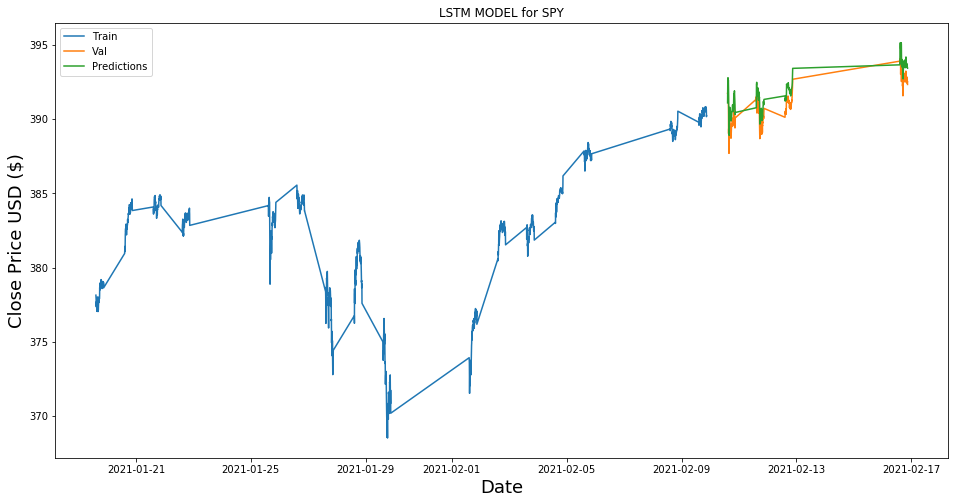

In [52]:
# Plot the data
train_1 = data_1[:training_data_len_1]
valid_1 = data_1[training_data_len_1:]
valid_1['Predictions'] = predictions_1
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM MODEL for SPY')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_1['Close'])
plt.plot(valid_1[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [53]:
#Show the valid and predicted prices
valid_1

,Close,Predictions
Datetime,,
2021-02-10 09:30:00-05:00,391.739990,391.100769
2021-02-10 09:35:00-05:00,391.790009,392.013184
2021-02-10 09:40:00-05:00,391.674988,392.624573
2021-02-10 09:45:00-05:00,391.760010,392.767731
2021-02-10 09:50:00-05:00,391.519989,392.793121
...,...,...
2021-02-16 15:35:00-05:00,392.420013,393.681610
2021-02-16 15:40:00-05:00,392.679993,393.478577
2021-02-16 15:45:00-05:00,392.489990,393.513672


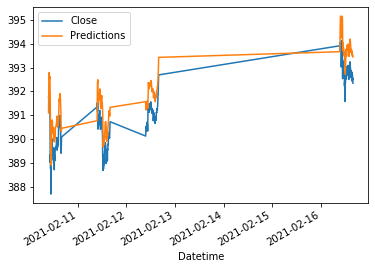

In [54]:
valid_1.plot()